#Predict what makes for a successful bike station

In [110]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import random
from sklearn import linear_model
from sklearn.linear_model import Lasso
from sklearn.cross_validation import train_test_split

In [60]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (14.0, 6.0)

In [61]:
weather = pd.read_table('daily_weather.tsv')
usage = pd.read_table('usage_2012.tsv')
stations = pd.read_table('stations.tsv')

#Compute the number of rentals per station per day

In [62]:
days = usage[['station_start', 'time_start']]
days['day'] = days['time_start'].str[5:10]
days['count'] = 1

/Users/Scott/.virtualenvs/bike_share/lib/python2.7/site-packages/IPython/kernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from IPython.kernel.zmq import kernelapp as app
/Users/Scott/.virtualenvs/bike_share/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [63]:
new_stations = pd.merge(days, stations, left_on='station_start', right_on='station')

In [64]:
rentals_per_station = new_stations.groupby('station').size()

In [65]:
avg_rentals = rentals_per_station.apply(lambda x: x/366)
avg_rentals

station
10th & E St NW                                       17
10th & Monroe St NE                                  10
10th & U St NW                                       71
10th St & Constitution Ave NW                        55
11th & H St NE                                       35
11th & Kenyon St NW                                  61
12th & Army Navy Dr                                  10
12th & L St NW                                       23
12th & Newton St NE                                   3
13th & D St NE                                       52
13th & H St NE                                       42
13th St & New York Ave NW                            53
14th & D St NW / Ronald Reagan Building              51
14th & D St SE                                       33
14th & G St NW                                       53
14th & Harvard St NW                                 71
14th & R St NW                                       68
14th & Rhode Island Ave NW              

###Our stations data has a huge number of quantitative attributes: fast_food, parking, restaurant, etc... Some of them are encoded as 0 or 1 (for absence or presence), others represent counts. To start with, run a simple linear regression where the input (x) variables are all the various station attributes and the output (y) variable is the average number of rentals per day.

In [66]:
new_df = DataFrame(avg_rentals.index, columns=['station'])
new_df['avg_rentals'] = avg_rentals.values
new_df['station'] = avg_rentals.index
avg_station = pd.merge(left=new_df, right=stations, on='station')


# Plot the predicted values (model.predict(x)) against the actual values and see how they compare.

In [67]:
x = avg_station[list(avg_station.columns.values[8:])]
y = avg_station[list(avg_station.columns.values[1:2])]

In [68]:
regr = linear_model.LinearRegression()
regr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

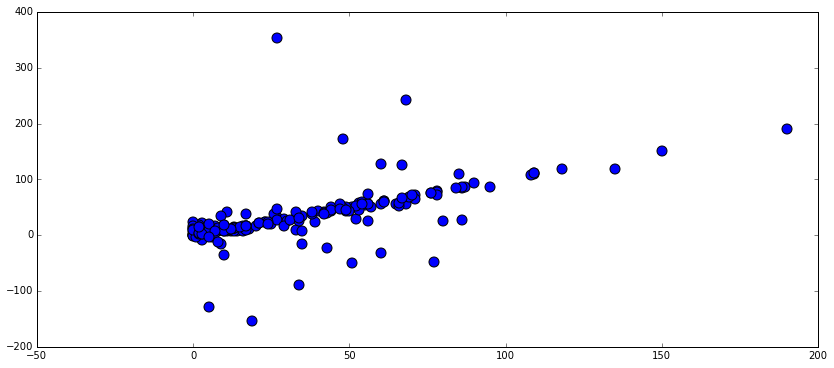

In [81]:
plt.scatter(y, regr.predict(x), s=100)
plt.show()

In [84]:
lass = Lasso(alpha=0.15)
lass.fit(x, y)

Lasso(alpha=0.15, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.25, random_state=50)

In [72]:
regr = linear_model.LinearRegression()

In [73]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

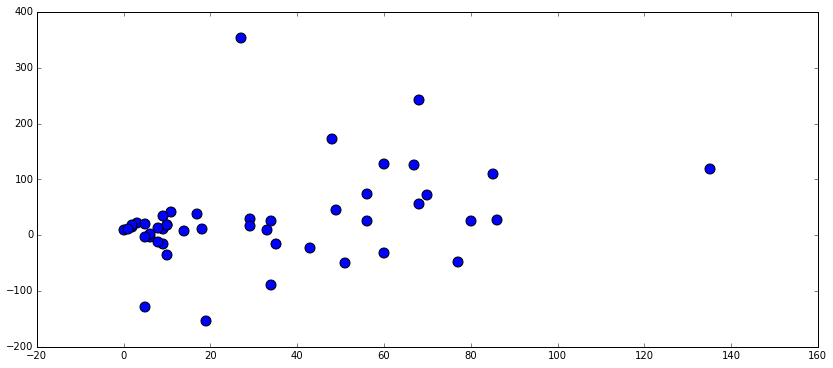

In [80]:
plt.scatter(y_test, regr.predict(x_test), s=100)
plt.show()

In [75]:
regr = linear_model.LinearRegression()

In [76]:
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

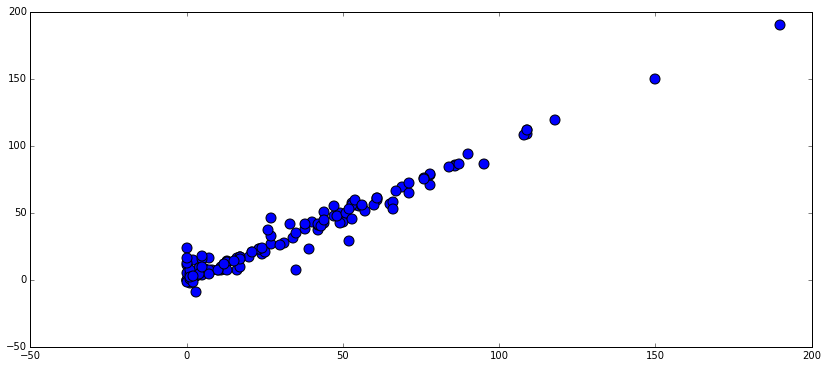

In [79]:
plt.scatter(y_train, regr.predict(x_train), s=100)
plt.show()

###Since we have so many variables, this is a good candidate for regularization. In particular, since we'd like to eliminate a lot of them, lasso seems like a good candidate. Build a lasso model on your training data for various values of alpha. Which variables survive?

In [98]:
lass = Lasso(alpha=.05)
lass.fit(x_train, y_train)

Lasso(alpha=0.05, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [145]:
lass.predict(x_train)[:5]

array([ 26.15487057,  27.64954063,  26.98006496,  76.4599531 ,  26.23404295])

In [154]:
for idx in range(10):
    rand = random()
    lass = Lasso(alpha=float(rand))
    lass.fit(x_train, y_train)
    print 'Alpha={}'.format(float(rand)), lass.predict(x_train)[:5]

Alpha=0.234700143566 [ 25.27242517  21.01832593  29.94432938  70.32398967  32.50966695]
Alpha=0.423500720139 [ 26.63177714  27.97972835  30.58130998  76.38527461  29.30561861]
Alpha=0.908330266998 [ 25.48119885  27.44762452  24.36459125  74.94649788  25.6931936 ]
Alpha=0.957953573243 [ 25.42055699  27.41339695  23.66457643  74.55645809  25.83741713]
Alpha=0.95216367752 [ 25.42144559  27.41855791  23.749116    74.59819522  25.81837699]
Alpha=0.0268612462511 [ 20.8953925   15.70684562  29.74771508  73.23657899  45.73656088]
Alpha=0.517098004549 [ 26.51745111  27.90444396  30.29696692  77.47962581  27.63479604]
Alpha=0.628075691419 [ 26.28933725  27.71395871  27.92011112  76.78242371  26.55142876]
Alpha=0.459268828363 [ 26.58774775  27.99479818  30.60908741  76.91140781  28.70993781]
Alpha=0.368171824763 [ 26.46582998  27.29035052  30.29755976  75.4198396   30.20188681]


###How does this model perform on the test set?

In [151]:
lass = Lasso(alpha=.5)
lass.fit(x_test, y_test)

Lasso(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [152]:
lass.predict(x_train)[:5]

array([ 34.03367212,  28.0498293 ,  32.90781279,  29.92721137,  34.1245916 ])

In [155]:
for idx in range(10):
    rand = random()
    lass = Lasso(alpha=float(rand))
    lass.fit(x_test, y_test)
    print 'Alpha={}'.format(float(rand)), lass.predict(x_train)[:5]

Alpha=0.792642756101 [ 28.98185453  30.70393272  23.22009799  17.39672851  31.59258359]
Alpha=0.291736222366 [ 38.00694723  23.78743507  36.12631519  36.35679546  36.18045834]
Alpha=0.0164024922065 [ 54.06213867  11.33976022  32.86386091  73.58416512  81.4868313 ]
Alpha=0.158658065376 [ 40.70225358  20.55404195  38.76070774  33.90327636  36.33100657]
Alpha=0.574904594495 [ 32.58117037  28.6659392   29.69340387  24.6191329   33.56419502]
Alpha=0.205797133919 [ 39.80591643  21.94155068  37.54168838  35.64148787  36.49619408]
Alpha=0.369779024228 [ 36.38874944  25.72432379  35.93372224  35.27955356  35.28445467]
Alpha=0.970457658681 [ 27.95132992  30.87072501  20.83173448  16.32635234  31.48189037]
Alpha=0.705352501131 [ 30.01345819  30.27655759  25.20840394  18.88867771  32.22280729]
Alpha=0.460073944025 [ 34.80721701  27.72102944  34.62000721  32.75626501  34.42380944]


####I honestly have little idea what's happening above here... I also have no idea how to get the data below into a simple linear regression....

###No matter how high I make alpha, the coefficient on crossing ("number of nearby crosswalks") never goes away. Try a simple linear regression on just that variable.